# polaris_asap_poses.    

In [1]:
%load_ext autoreload
%autoreload 2    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
from pathlib import Path
POLARIS_ASAP_POSES_HOME = Path(os.environ["POLARIS_ASAP_POSES_HOME"])
os.chdir(POLARIS_ASAP_POSES_HOME)    

In [3]:
from polaris_asap_poses.settings import get_settings
settings = get_settings()    

In [4]:
from polaris_asap_poses.logger import logger
logger.info("hello world")    

INFO    | 2025-03-03 22:05:42.865| __main__:2   | hello world


In [5]:
import polars as pl
import numpy as np
import polars.selectors as cs
from tqdm import tqdm
from pathlib import Path    

In [6]:
import polaris as po
competition = po.load_competition("asap-discovery/antiviral-ligand-poses-2025")

[2025-03-03 22:06:16] INFO     The version of Polaris that was used to create the artifact (0.11.0) ]8;id=894409;file:///home/cbrown/workspace/polaris-asap-poses/.venv/lib/python3.12/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=871740;file:///home/cbrown/workspace/polaris-asap-poses/.venv/lib/python3.12/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.9).                                                                           

                      WARNING  You're loading data from a remote location. If the dataset is small     ]8;id=30732;file:///home/cbrown/workspace/polaris-asap-poses/.venv/lib/python3.12/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=303116;file:///home/cbrown/workspace/polaris-asap-poses/.venv/lib/python3.12/site-packages/polaris/dataset/_base.py#181\181]8;;\
                               enough, consider caching the dataset first using                                    
                               CompetitionSpecification.cache() for more performant data access.                   

In [7]:
competition.cache()

Output()

[22:06:47] Copying to destination                                                                      ]8;id=261708;file:///home/cbrown/workspace/polaris-asap-poses/.venv/lib/python3.12/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=164080;file:///home/cbrown/workspace/polaris-asap-poses/.venv/lib/python3.12/site-packages/polaris/dataset/_base.py#380\380]8;;\
           /home/cbrown/.cache/polaris/datasets/c7c6e496-ea5b-4697-abb4-e06f20d658e9/data.zarr                     

           For large Zarr archives, this may take a while.                                             ]8;id=715517;file:///home/cbrown/workspace/polaris-asap-poses/.venv/lib/python3.12/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=564290;file:///home/cbrown/workspace/polaris-asap-poses/.venv/lib/python3.12/site-packages/polaris/dataset/_base.py#381\381]8;;\

[22:06:58]  Success: Copying Zarr keys                                                                ]8;id=893061;file:///home/cbrown/workspace/polaris-asap-poses/.venv/lib/python3.12/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=659339;file:///home/cbrown/workspace/polaris-asap-poses/.venv/lib/python3.12/site-packages/polaris/utils/context.py#53\53]8;;\

            Success: Copying Zarr archive                                                             ]8;id=642910;file:///home/cbrown/workspace/polaris-asap-poses/.venv/lib/python3.12/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=326589;file:///home/cbrown/workspace/polaris-asap-poses/.venv/lib/python3.12/site-packages/polaris/utils/context.py#53\53]8;;\

'/home/cbrown/.cache/polaris/datasets/c7c6e496-ea5b-4697-abb4-e06f20d658e9'

In [8]:
train, test = competition.get_train_test_split()

In [9]:
X, y = train[0]

In [10]:
X

{'CXSMILES': 'c1ccc(SCC[NH+]2CCOCC2)cc1',
 'Chain B Sequence': 'SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLEDEFTPFDVVRQCSGVT',
 'Protein Label': 'SARS-CoV-2 Mpro',
 'Chain A Sequence': 'SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLEDEFTPFDVVRQCSGVT'}

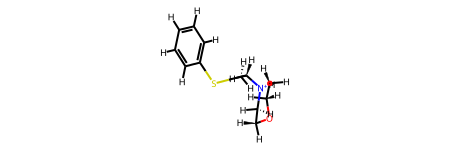

In [11]:
y

In [13]:
test[0]

{'CXSMILES': 'O=C1c2ccc(Cl)cc2[C@@]2(CN1Cc1nnco1)C(=O)N(c1cncc3ccccc13)C[C@@H]2CNc1ncncn1',
 'Chain B Sequence': 'SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPADQLSDPNYDALLISMTNHSFSVQKHIGAPANLRVVGHAMQGTLLKLTVDVANPSTPAYTFTTVKPGAAFSVLACYNGRPTGTFTVVMRPNYTIKGSFLCGSCGSVGYTKEGSVINFCYMHQMELANGTHTGSAFDGTMYGAFMDKQVHQVQLTDKYCSVNVVAWLYAAILNGCAWFVKPNRTSVVSFNEWALANQFTEFVGTQSVDMLAVKTGVAIEQLLYAIQQLYTGFQGKQILGSTMLEDEFTPEDVNMQIMGV',
 'Protein Label': 'MERS-CoV Mpro',
 'Chain A Sequence': 'SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPADQLSDPNYDALLISMTNHSFSVQKHIGAPANLRVVGHAMQGTLLKLTVDVANPSTPAYTFTTVKPGAAFSVLACYNGRPTGTFTVVMRPNYTIKGSFLCGSCGSVGYTKEGSVINFCYMHQMELANGTHTGSAFDGTMYGAFMDKQVHQVQLTDKYCSVNVVAWLYAAILNGCAWFVKPNRTSVVSFNEWALANQFTEFVGTQSVDMLAVKTGVAIEQLLYAIQQLYTGFQGKQILGSTMLEDEFTPEDVNMQIMGV'}

In [14]:
train[0]

({'CXSMILES': 'c1ccc(SCC[NH+]2CCOCC2)cc1',
  'Chain B Sequence': 'SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLEDEFTPFDVVRQCSGVT',
  'Protein Label': 'SARS-CoV-2 Mpro',
  'Chain A Sequence': 'SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLEDEFTPFDVVRQCSGVT'},
 <rdkit.Chem.rdchem.Mol at 0x7beee567dcb0>)